In [50]:
import requests
import time
import xml.etree.cElementTree as ET
import numpy as np
import random
import operator
import matplotlib.pyplot as plt
pred_list=""
pred_list_=""
ground_truth = 'SSSSRRRSSSSRRSSSSSSSRRRSSSSRRSSSSSSSRRRSSSSRRSSSSSSSRRRSSSSRRSSSSSSSRRRSSSSRRSSSSSSSRRRSSSSRRSSSSSSSRRRSSSSRRSSSSSSSRRRSSSSRRSSSSSSSRRRSSSSRRSSSSSSSRRRSSSSRRSSSSSSSRRRSSSSRRSSSSSSSRRRSSSSRRSSSSSSSRRRSSSSRRSSSSSSSRRRSSSSRRSSSSSSSRRRSSSSRRSSSSSSSRRRSSSSRRSSSSSSSRRRSSSSRRSSSSSSSRRRSSSSRRSSSSSSSRRRSSSSRRSSS'
print(len(ground_truth))

304


In [ ]:
def get_observation_prob1(x):
    temp = []
    temp = x.split(',')

    obe = []
    for i in range(2):
        obe.append(int(temp[i]))
    print(obe)
    return obe

# 單一HMM測試 

In [18]:
def CHMM1(obe,k,a,ground_truth,old_):   
    states = {"0":"晴天","1":"雨天"}
    state_list = []

    A = np.array([
        [0.8,0.2],
        [0.4,0.6]
        ])
    B = np.array([
        [0.8,0.2],
        [0.4,0.6],
        ])
    
    π = np.array([0.5,0.5])
    global pred_list_
    b = [0,0]
    print('======================')
    print('第'+str(k+1)+'天')
    for i in range(2):		#狀態轉移
        s=0
        for j in range(2):
            if k == 0:
                s = s +  a[j] * A[j,i] * B[i,obe[0]]
            else:
                s = s +  old_[j] * A[j,i] * B[i,obe[0]]
        b[i] = s
    
    if obe[0] == 0:
        print("除濕機狀態:開啟")
    else:
        print("除濕機狀態:關閉")
        
    print("預測天氣為:" + states[str(b.index(max(b)))])
    print("真實天氣為:" + ground_truth[k])   
    
    a = np.array(b) 
    print("預測概率為；" + str(sum(a))) 
    global pred_list
    if b.index(max(b)) == 0:
        pred_list_ += 'S'
    else:
        pred_list_ += 'R'
       
                     
                     
    return a,pred_list_



    #     if(sum(exercise_activity) > sum(study_activity)):
    #         a = exercise_activity
    #         state_list.insert(t,0)
    #     else:
    #         a = study_activity
    #         state_list.insert(t,1)
    #     print(a)
    #     print('======================')

    #     print("第"+str(t+2)+"天運動概率")
    #     print(sum(exercise_activity))
    #     print("第"+str(t+2)+"天讀書概率")
    #     print(sum(study_activity))

    # print("Viterbi預測第2~4天的活動為")
    # print('The hidden activity:' + ', '.join(map(lambda x : states[str(x)], state_list)))

# CHMM測試

In [51]:
def CHMM2(obe,k,a,b,ground_truth, old):   
    states = {"0":"晴天","1":"雨天"}
    state_list = []
    p_atob = 0.5
    p_btoa = 0.5
    A = np.array([
        [0.8,0.2],
        [0.4,0.6]
        ])
    B = np.array([
        [0.8,0.2],
        [0.4,0.6]
    ])
    emi_prob_A = np.array([
        [0.8,0.2],
        [0.2,0.8],
        ])
    emi_prob_B = np.array([
        [0.2,0.8],
        [0.8,0.2],
        ])
    t_ = []
    t = [0,0]
    print('======================')
    print('第'+str(k+1)+'天')
    for i in range(2):		#狀態轉移
        s=0
        for j in range(2):
            if k == 0:
                s = s +  a[j] * b[j] * A[j,i] * B[j,i] * emi_prob_A[i,obe[0]] * emi_prob_B[i,obe[1]]
            else:
                s = s +  old[j] * A[j,i] * B[j,i] * emi_prob_A[i,obe[0]] * emi_prob_B[i,obe[1]] * p_atob * p_btoa
        t[i] = s
    if obe[0] == 0:
        print("除濕機狀態:關閉")
    else:
        print("除濕機狀態:開啟")
    if obe[1] == 0:
        print("清淨機狀態:關閉")
    else:
        print("清淨機狀態:開啟")
        
    print("預測天氣為:" + states[str(t.index(max(t)))])
    print("真實天氣為:" + ground_truth[k])   
    
    t_nparray = np.array(t) 
    print("預測概率為；" + str(sum(t))) 
    global pred_list
    if t.index(max(t)) == 0:
        pred_list += 'S'
    else:
        pred_list += 'R'
                
    return t_nparray,pred_list

# Main

C的資料結構實作
[1, 0]
第1天
除濕機狀態:開啟
清淨機狀態:關閉
預測天氣為:雨天
真實天氣為:S
預測概率為；0.06912000000000001
第1天
除濕機狀態:關閉
預測天氣為:雨天
真實天氣為:S
預測概率為；0.344
預測準確率:0.0
[0, 1]
第2天
除濕機狀態:關閉
清淨機狀態:開啟
預測天氣為:晴天
真實天氣為:S
預測概率為；0.002583552000000001
第2天
除濕機狀態:開啟
預測天氣為:晴天
真實天氣為:S
預測概率為；0.21312
預測準確率:0.5
[0, 1]
第3天
除濕機狀態:關閉
清淨機狀態:開啟
預測天氣為:晴天
真實天氣為:S
預測概率為；0.00024908390400000017
第3天
除濕機狀態:開啟
預測天氣為:晴天
真實天氣為:S
預測概率為；0.14351360000000002
預測準確率:0.6666666666666666
[1, 0]
第4天
除濕機狀態:開啟
清淨機狀態:關閉
預測天氣為:雨天
真實天氣為:S
預測概率為；3.269522227200003e-06
第4天
除濕機狀態:關閉
預測天氣為:雨天
真實天氣為:S
預測概率為；0.044500992
預測準確率:0.5
[1, 0]
第5天
除濕機狀態:開啟
清淨機狀態:關閉
預測天氣為:雨天
真實天氣為:R
預測概率為；1.1997775134720014e-07
第5天
除濕機狀態:關閉
預測天氣為:雨天
真實天氣為:R
預測概率為；0.01625186304
預測準確率:0.6
[0, 0]
第6天
除濕機狀態:關閉
清淨機狀態:關閉
預測天氣為:雨天
真實天氣為:R
預測概率為；2.5777308224716834e-09
第6天
除濕機狀態:開啟
預測天氣為:晴天
真實天氣為:R
預測概率為；0.009936941875200002
預測準確率:0.6666666666666666
[1, 0]
第7天
除濕機狀態:開啟
清淨機狀態:關閉
預測天氣為:雨天
真實天氣為:R
預測概率為；1.0553172330283023e-10
第7天
除濕機狀態:關閉
預測天氣為:雨天
真實天氣為:R
預測概率為；0.003272671494144001
預測準確率:0.7142857142857143
[0,

[1, 0]
第42天
除濕機狀態:開啟
清淨機狀態:關閉
預測天氣為:雨天
真實天氣為:S
預測概率為；6.761315824538137e-64
第42天
除濕機狀態:關閉
預測天氣為:雨天
真實天氣為:S
預測概率為；7.562342101167226e-15
預測準確率:0.6666666666666666
[0, 1]
第43天
除濕機狀態:關閉
清淨機狀態:開啟
預測天氣為:晴天
真實天氣為:S
預測概率為；4.2068582291241465e-65
第43天
除濕機狀態:開啟
預測天氣為:晴天
真實天氣為:S
預測概率為；4.73338835260159e-15
預測準確率:0.6744186046511628
[1, 1]
第44天
除濕機狀態:開啟
清淨機狀態:開啟
預測天氣為:晴天
真實天氣為:R
預測概率為；1.1348996908592053e-66
第44天
除濕機狀態:關閉
預測天氣為:雨天
真實天氣為:R
預測概率為；1.5359863912615959e-15
預測準確率:0.6590909090909091
[1, 0]
第45天
除濕機狀態:開啟
清淨機狀態:關閉
預測天氣為:雨天
真實天氣為:R
預測概率為；1.8519028956825442e-68
第45天
除濕機狀態:關閉
預測天氣為:雨天
真實天氣為:R
預測概率為；5.715102825311535e-16
預測準確率:0.6666666666666666
[0, 1]
第46天
除濕機狀態:關閉
清淨機狀態:開啟
預測天氣為:晴天
真實天氣為:S
預測概率為；1.0449421513915152e-69
第46天
除濕機狀態:開啟
預測天氣為:晴天
真實天氣為:S
預測概率為；3.4805228239551033e-16
預測準確率:0.6739130434782609
[0, 0]
第47天
除濕機狀態:關閉
清淨機狀態:關閉
預測天氣為:晴天
真實天氣為:S
預測概率為；2.813604346622545e-71
第47天
除濕機狀態:開啟
預測天氣為:晴天
真實天氣為:S
預測概率為；2.3313269234406144e-16
預測準確率:0.6808510638297872
[1, 1]
第48天
除濕機狀態:開啟
清淨機狀態:開啟
預測天氣為:晴天
真

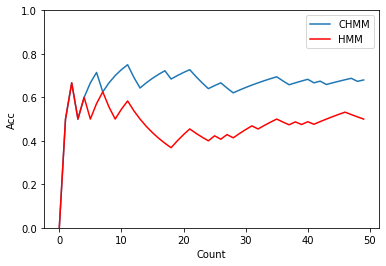

In [34]:
pred_list=""
pred_list_=""
states = {"0":"晴天","1":"雨天"}
print('======================')
print('C的資料結構實作')
print('======================')
k=0
acc_list = []
acc_list_= []
pred_list=""
z=0
#c=0
a = np.array([0.6,0.4])
b = np.array([0.4,0.6])
old = [0,0]
old_ = [0,0]
while(z < 304):
    c=0
    c_=0
    tree = ET.ElementTree(file='notify.xml')
    root = tree.getroot()
    x = root[3].attrib
    obeservation = get_observation_prob1(x['val'])
#    print(obeservation)

    t,pred_list = CHMM2(obeservation,k,a,b,ground_truth, old) 
    old = t.tolist()
    t_,pred_list_ = CHMM1(obeservation,k,a,ground_truth,old_)
    old_ = t_.tolist()
    k+=1
    z+=1
    for i in range(len(pred_list)):
        if operator.eq(ground_truth[i],pred_list[i]):
            c+=1
    for i in range(len(pred_list_)):
        if operator.eq(ground_truth[i],pred_list_[i]):
            c_+=1
    accuracy = c/len(pred_list)
    accuracy_ = c_/len(pred_list_)
    acc_list.append(accuracy)
    acc_list_.append(accuracy_)
    print("預測準確率:" + str(accuracy))
    time.sleep(0.25)
plt.plot(np.arange(len(pred_list)),np.asarray(acc_list),label='CHMM')
plt.plot(np.arange(len(pred_list_)),np.asarray(acc_list_),'r',label='HMM')
plt.xlabel('Count')
plt.ylabel('Acc')
plt.ylim(0,1.0)
plt.legend(loc='best')
plt.savefig('16.png')
plt.show()
# print(pred_list)
# for i in range(len(pred_list)):
#     if operator.eq(ground_truth[i],pred_list[i]):
#         c+=1
# accuracy = c/len(pred_list)
# print("預測準確率:" + str(accuracy))

In [36]:
def show_img(img_list, img_name_list):
    i = 0
    for img in img_list:
        plt.figure(figsize=(15,15))
        plt.subplot(2,2,i+1)
        plt.title(img_name_list[i])
        plt.imshow(img)
        i+=1
    plt.show()

# Show Result

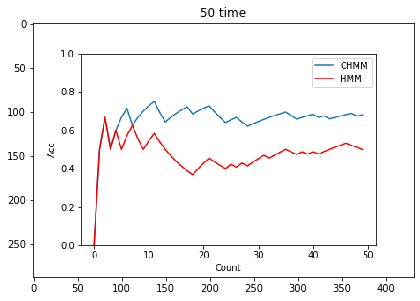

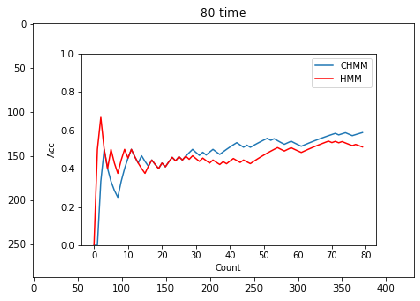

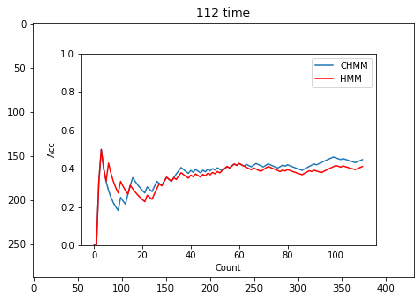

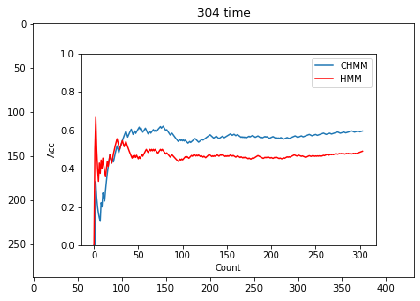

In [37]:
import matplotlib.image as mpimg
img_list = []
img_name_list=["50 time","80 time", "112 time", "304 time"]
img50 = mpimg.imread('50_1.png')
img80 = mpimg.imread('80_1.png')
img112 = mpimg.imread('112_1.png')
img304 = mpimg.imread('304_1.png')
img_list.append(img50)
img_list.append(img80)
img_list.append(img112)
img_list.append(img304)
show_img(img_list, img_name_list)

In [43]:
import random
hidden_var_name = ('sunny', 'foggy', 'rainy')
observation_var_name = ('no', 'yes')
input_list = []
i = 0
while(i<90):
    if random.random() < 0.8:
        input_list.append('sunny,no')
    else:
        input_list.append('sunny,yes')
    i+=1
i=0
while(i<60):
    if random.random() < 0.4:
        input_list.append('foggy,no')
    else:
        input_list.append('foggy,yes')
    i+=1
i=0
while(i<60):
    if random.random() < 0.2:
        input_list.append('rainy,no')
    else:
        input_list.append('rainy,yes')
    i+=1
random.shuffle(input_list)
for data in input_list:
    with open('input.txt', 'a') as f:        
        f.write(data)
        f.write('\n')